# Murat Gün 2018107036

## Pima Indians Diabetes Database EDA and Machine Learning Project

Introduction:

The dataset is Pima Indians Diabetes Database from Kaggle which and objective of dataset is to predict whether or not a patient has diabetes considering diagnostic measures that are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, 	DiabetesPedigreeFunction, and Age. I chose that dataset because there were a lot of problems in data preprocessing. In other datasets I reviewed the data was either already cleaned or there were just 1 way to fill missing values. In that dataset, however, the number of missing values are huge and beacuse of the nature of the data I had a chance to handle those values with different techniques. By missing values, by the way, I mean "0". It seems that the creator of the data put "0" when the value is NaN, I came to that conclusion because the columns dont allow it "0" as values such as Skin Thickness.

Steps:

I first cleaned duplicates, then dropped the column "Pregnancies" since there were some doubts about its accuracy.

Then looked at the histogram and filled the missing values ("0") accordingly.

Then removed outliers.

Then encoded columns "Age" and "BMI".

Then pairplotted features and correlation heatmap.

Splitted the data, scaled and see the accuracy of different models.

Hyperparametering for models and selecting better ones.

Comparing their performances based on appropriate metrics considering the nature of the data.

Sketching feature importances of the best model.







In [ ]:
! kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 16.5MB/s]


In [ ]:
from google.colab import  userdata
import os

os.environ["KAGGLE_USERNAME"] = 'muratgn'
os.environ["KAGGLE_KEY"] = '7626ea822b82ec2d50cd03787da5220d'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

df = pd.read_csv('/content/pima-indians-diabetes-database.zip')
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Cleaning Duplicates

df_cleaned = df.drop_duplicates()
df_cleaned.reset_index(drop=True, inplace=True)
df = df_cleaned
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Pregnancies column seems problematic, the average of it is 3.84 and max is 17. At first, I figured it as the number of pregnancies but I saw some doubts on the internet about that data.
#Therefore, I will disregard the column "Pregnancies". For the rest, I will look at the histograms.
df.drop(columns=['Pregnancies'], inplace=True)
df


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


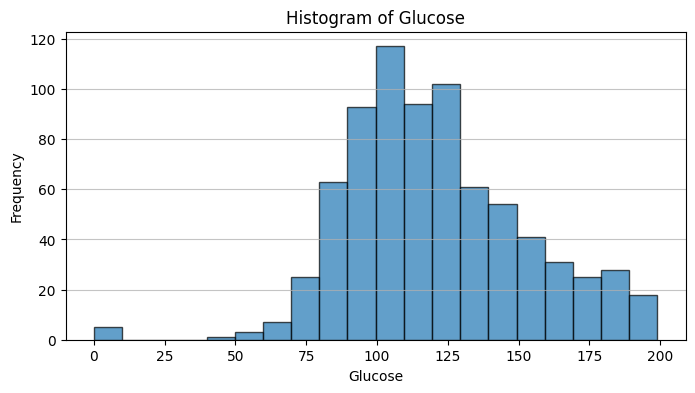

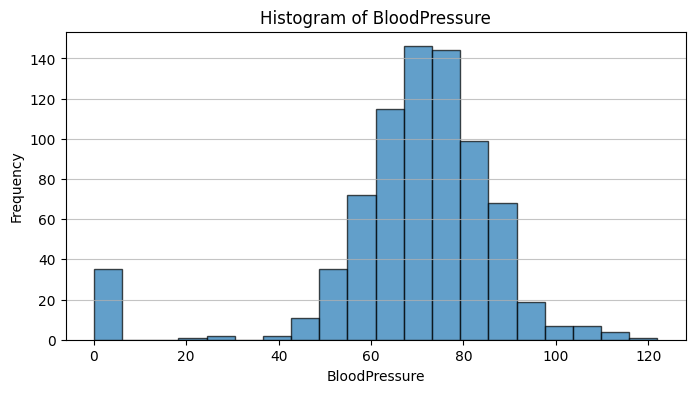

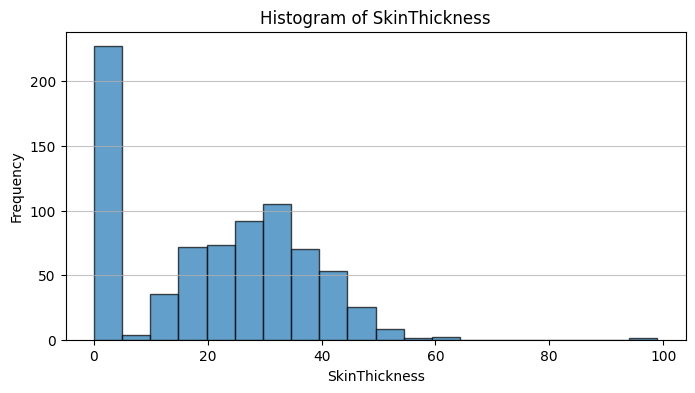

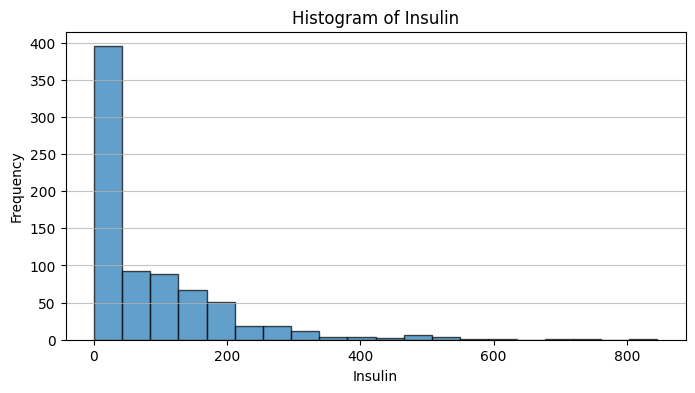

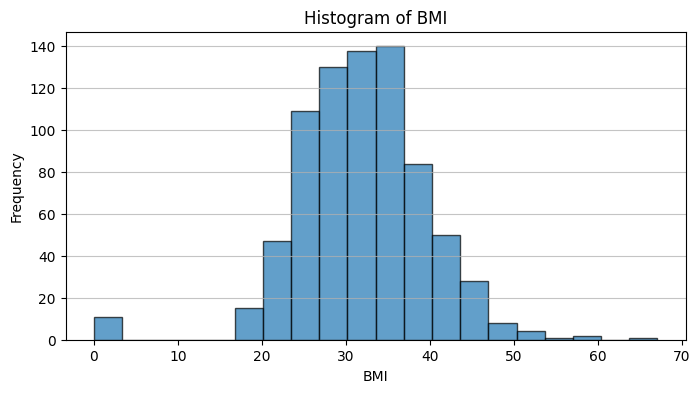

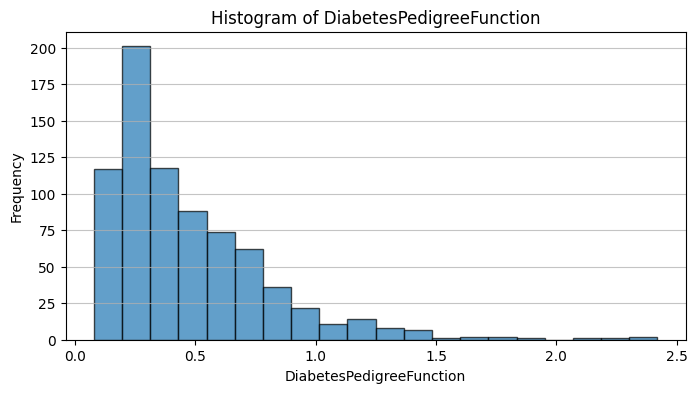

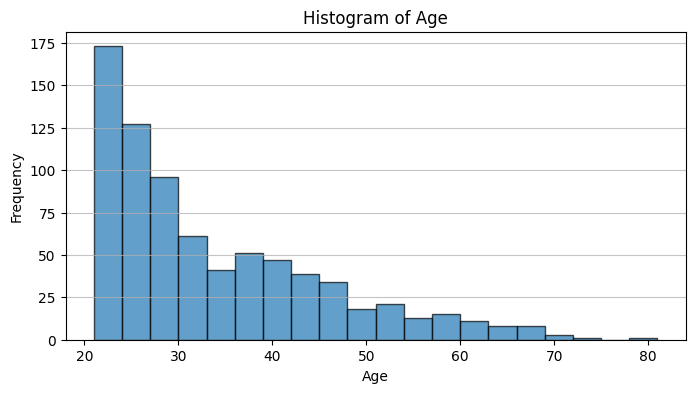

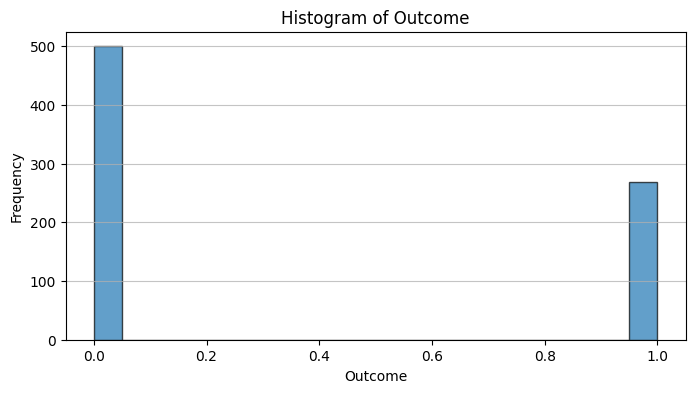

In [ ]:
import matplotlib.pyplot as plt

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    df[column].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


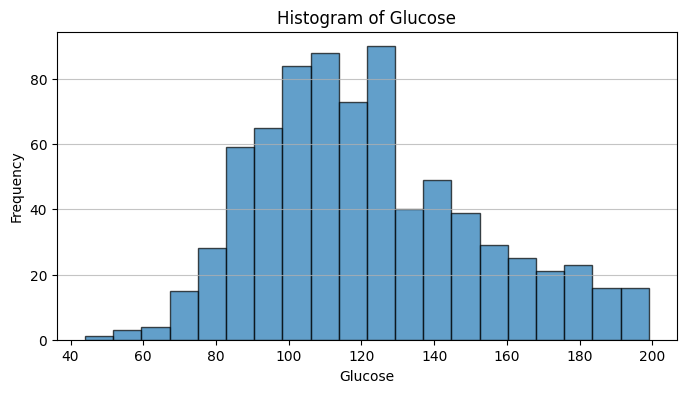

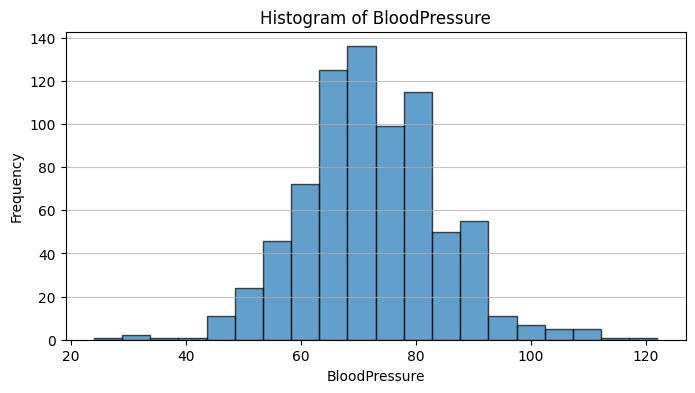

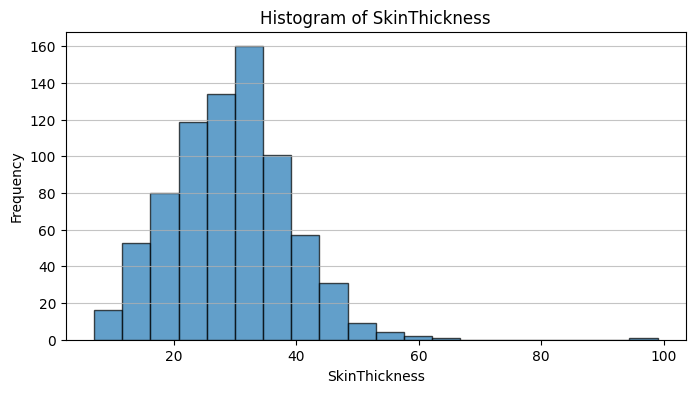

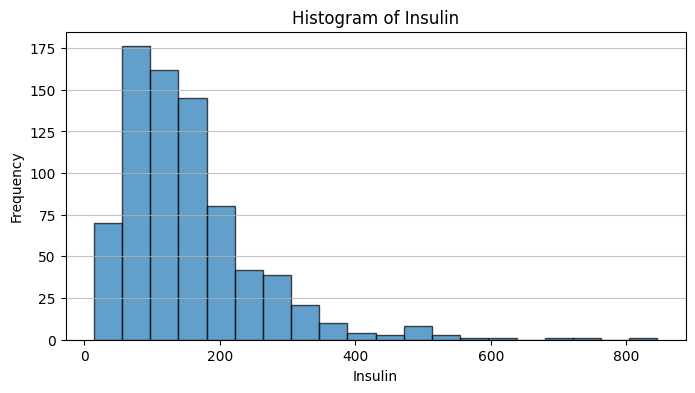

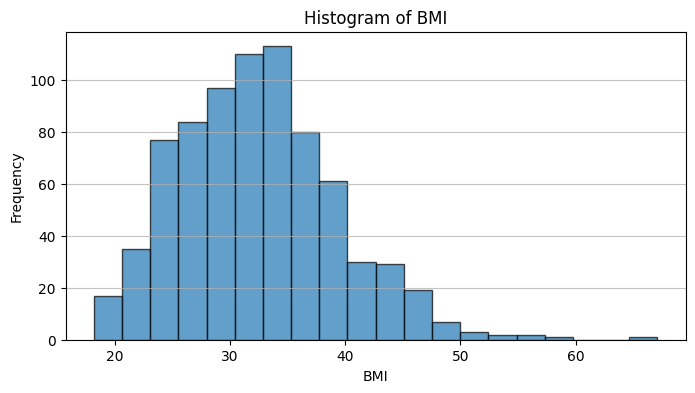

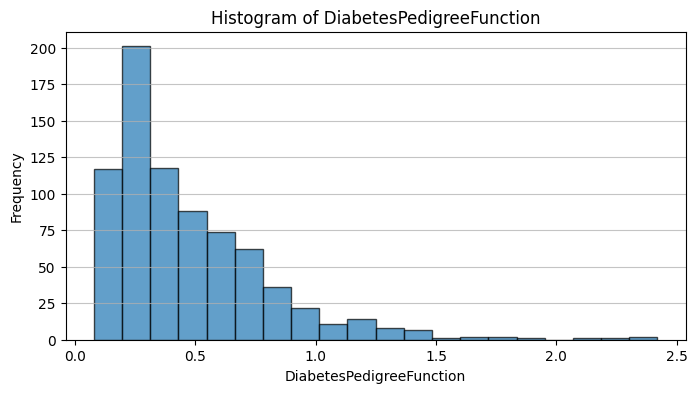

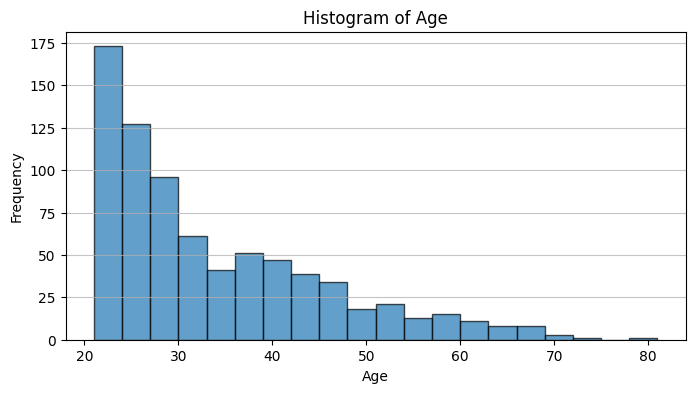

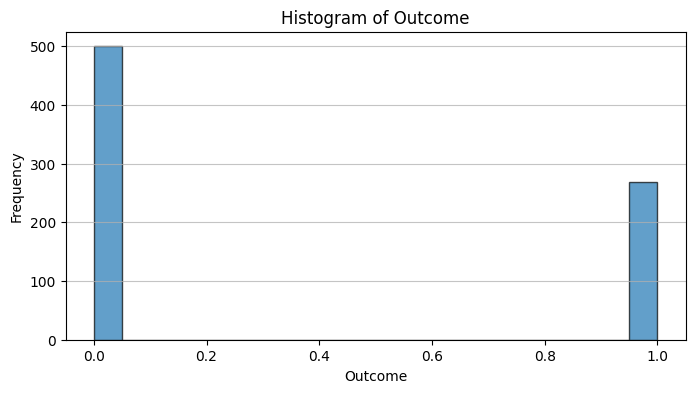

In [ ]:
# Glucose, BloodPressure,SkinThickness, BMI shows normal distribution, Insulin, DiabetesPedigreeFunction shows skewed distribution. Except SkinThickness I filled the "0" i.e. Null values with mean.
#I did not fill SkinThickness with mean since the number of "0" i.e. Null values is so many, it distorts distribution. Since it is skewed, ,it would make sense if I were to
# fill Null values but since number of Null is too many, it gave huge number of outliers. Therefore, I used KNN for SkinThickness and the rest.

#Filling Null values with mean.

df['Glucose'] = df['Glucose'].replace(0, np.nan)
mean_excluding_zero_Glucose = df['Glucose'].mean()
df['Glucose'] = df['Glucose'].fillna(mean_excluding_zero_Glucose)

df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
mean_excluding_zero_BloodPressure = df['BloodPressure'].mean()
df['BloodPressure'] = df['BloodPressure'].fillna(mean_excluding_zero_BloodPressure)

df['BMI'] = df['BMI'].replace(0, np.nan)
mean_excluding_zero_BMI = df['BMI'].mean()
df['BMI'] = df['BMI'].fillna(mean_excluding_zero_BMI)

#KNN

from sklearn.impute import KNNImputer

df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
imputer = KNNImputer(n_neighbors=3)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df['SkinThickness']=df_imputed['SkinThickness']
df['Insulin'] = df_imputed['Insulin']
df['DiabetesPedigreeFunction']=df_imputed['DiabetesPedigreeFunction']


#Histogram after handling missing values

import matplotlib.pyplot as plt

for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    df[column].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()



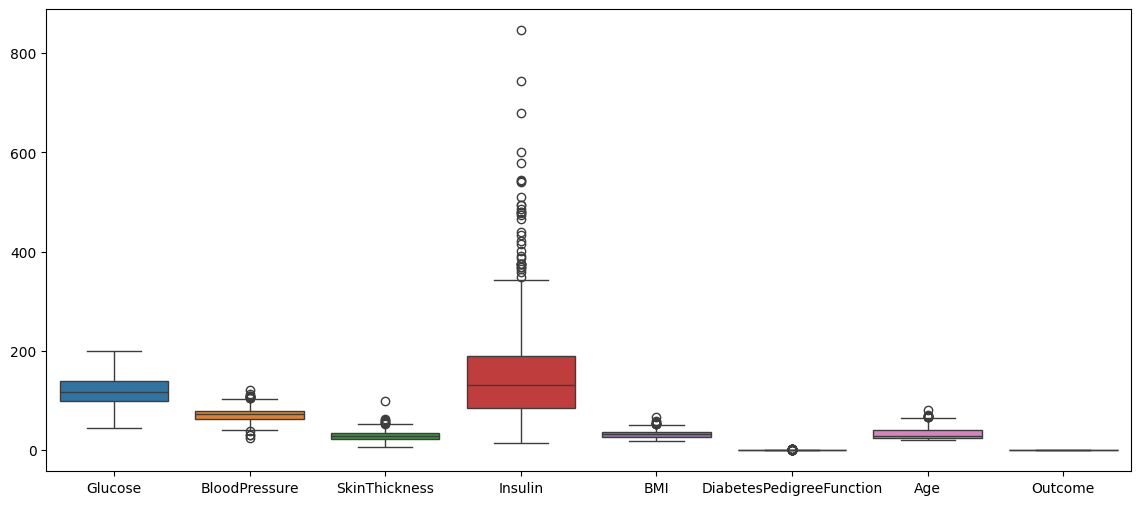

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,125.333333,33.6,0.627,50,1
1,85.0,66.0,29.0,66.666667,26.6,0.351,31,0
2,183.0,64.0,26.0,211.666667,23.3,0.672,32,1
3,89.0,66.0,23.0,94.000000,28.1,0.167,21,0
4,137.0,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.000000,32.9,0.171,63,0
764,122.0,70.0,27.0,166.666667,36.8,0.340,27,0
765,121.0,72.0,23.0,112.000000,26.2,0.245,30,0
766,126.0,60.0,31.0,120.666667,30.1,0.349,47,1


In [ ]:
#Box plot for outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=df)
plt.show()
df

In [ ]:
import pandas as pd

#I used label encoding for Age and BMI since the data is ordinal meaning having hierarchy.

# New feature of age bin encoded
bins_Age = [17, 30, 40, 50, 60, 70, 82]
labels = ['17-30', '31-40', '41-50', '51-60', '61-70', '71-82']
df['Age Category'] = pd.cut(df['Age'], bins=bins_Age, labels=labels)
df['Age Bin Encoded'] = df['Age Category'].map({'17-30': 0, '31-40': 1, '41-50': 2, '51-60': 3, '61-70': 4, '71-82': 5})
df['Age Bin Encoded'] = pd.to_numeric(df['Age Bin Encoded'],)

# New feature of BMI encoded
bins_BMI = [0, 18.5, 25, 30, 35, 40, 100]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity Level 1', 'Obesity Level 2', 'Obesity Level 3']
df['BMI Category'] = pd.cut(df['BMI'], bins=bins_BMI, labels=labels, right=False)
df['BMI Category Encoded'] = df['BMI Category'].map({'Underweight': 0, 'Normal weight': 1, 'Overweight': 2, 'Obesity Level 1': 3, 'Obesity Level 2': 4, 'Obesity Level 3': 5})
df['BMI Category Encoded'] = pd.to_numeric(df['BMI Category Encoded'],)
df = df.drop(['Age Category', 'Age', 'BMI', 'BMI Category'], axis=1)
df




,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,Age Bin Encoded,BMI Category Encoded
0,148.0,72.0,35.0,125.333333,0.627,1,2,3
1,85.0,66.0,29.0,66.666667,0.351,0,1,2
2,183.0,64.0,26.0,211.666667,0.672,1,1,1
3,89.0,66.0,23.0,94.000000,0.167,0,0,2
4,137.0,40.0,35.0,168.000000,2.288,1,1,5
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.000000,0.171,0,4,3
764,122.0,70.0,27.0,166.666667,0.340,0,0,4
765,121.0,72.0,23.0,112.000000,0.245,0,0,2
766,126.0,60.0,31.0,120.666667,0.349,1,2,3


In [ ]:
# Remove outliers column-wise except for 'Age Bin Encoded', 'BMI Category Encoded' and 'Outcome'
def remove_outliers_columnwise(df, exclude_columns):
    for col in df.columns:
        if col not in exclude_columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

exclude_columns = ['Age Bin Encoded','BMI Category Encoded','Outcome']
df_cleaned_columnwise = remove_outliers_columnwise(df, exclude_columns)
df = df_cleaned_columnwise
df


,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Outcome,Age Bin Encoded,BMI Category Encoded
0,148.0,72.0,35.000000,125.333333,0.627,1,2,3
1,85.0,66.0,29.000000,66.666667,0.351,0,1,2
2,183.0,64.0,26.000000,211.666667,0.672,1,1,1
3,89.0,66.0,23.000000,94.000000,0.167,0,0,2
5,116.0,74.0,18.333333,109.000000,0.201,0,0,2
...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,0.171,0,4,3
764,122.0,70.0,27.000000,166.666667,0.340,0,0,4
765,121.0,72.0,23.000000,112.000000,0.245,0,0,2
766,126.0,60.0,31.000000,120.666667,0.349,1,2,3


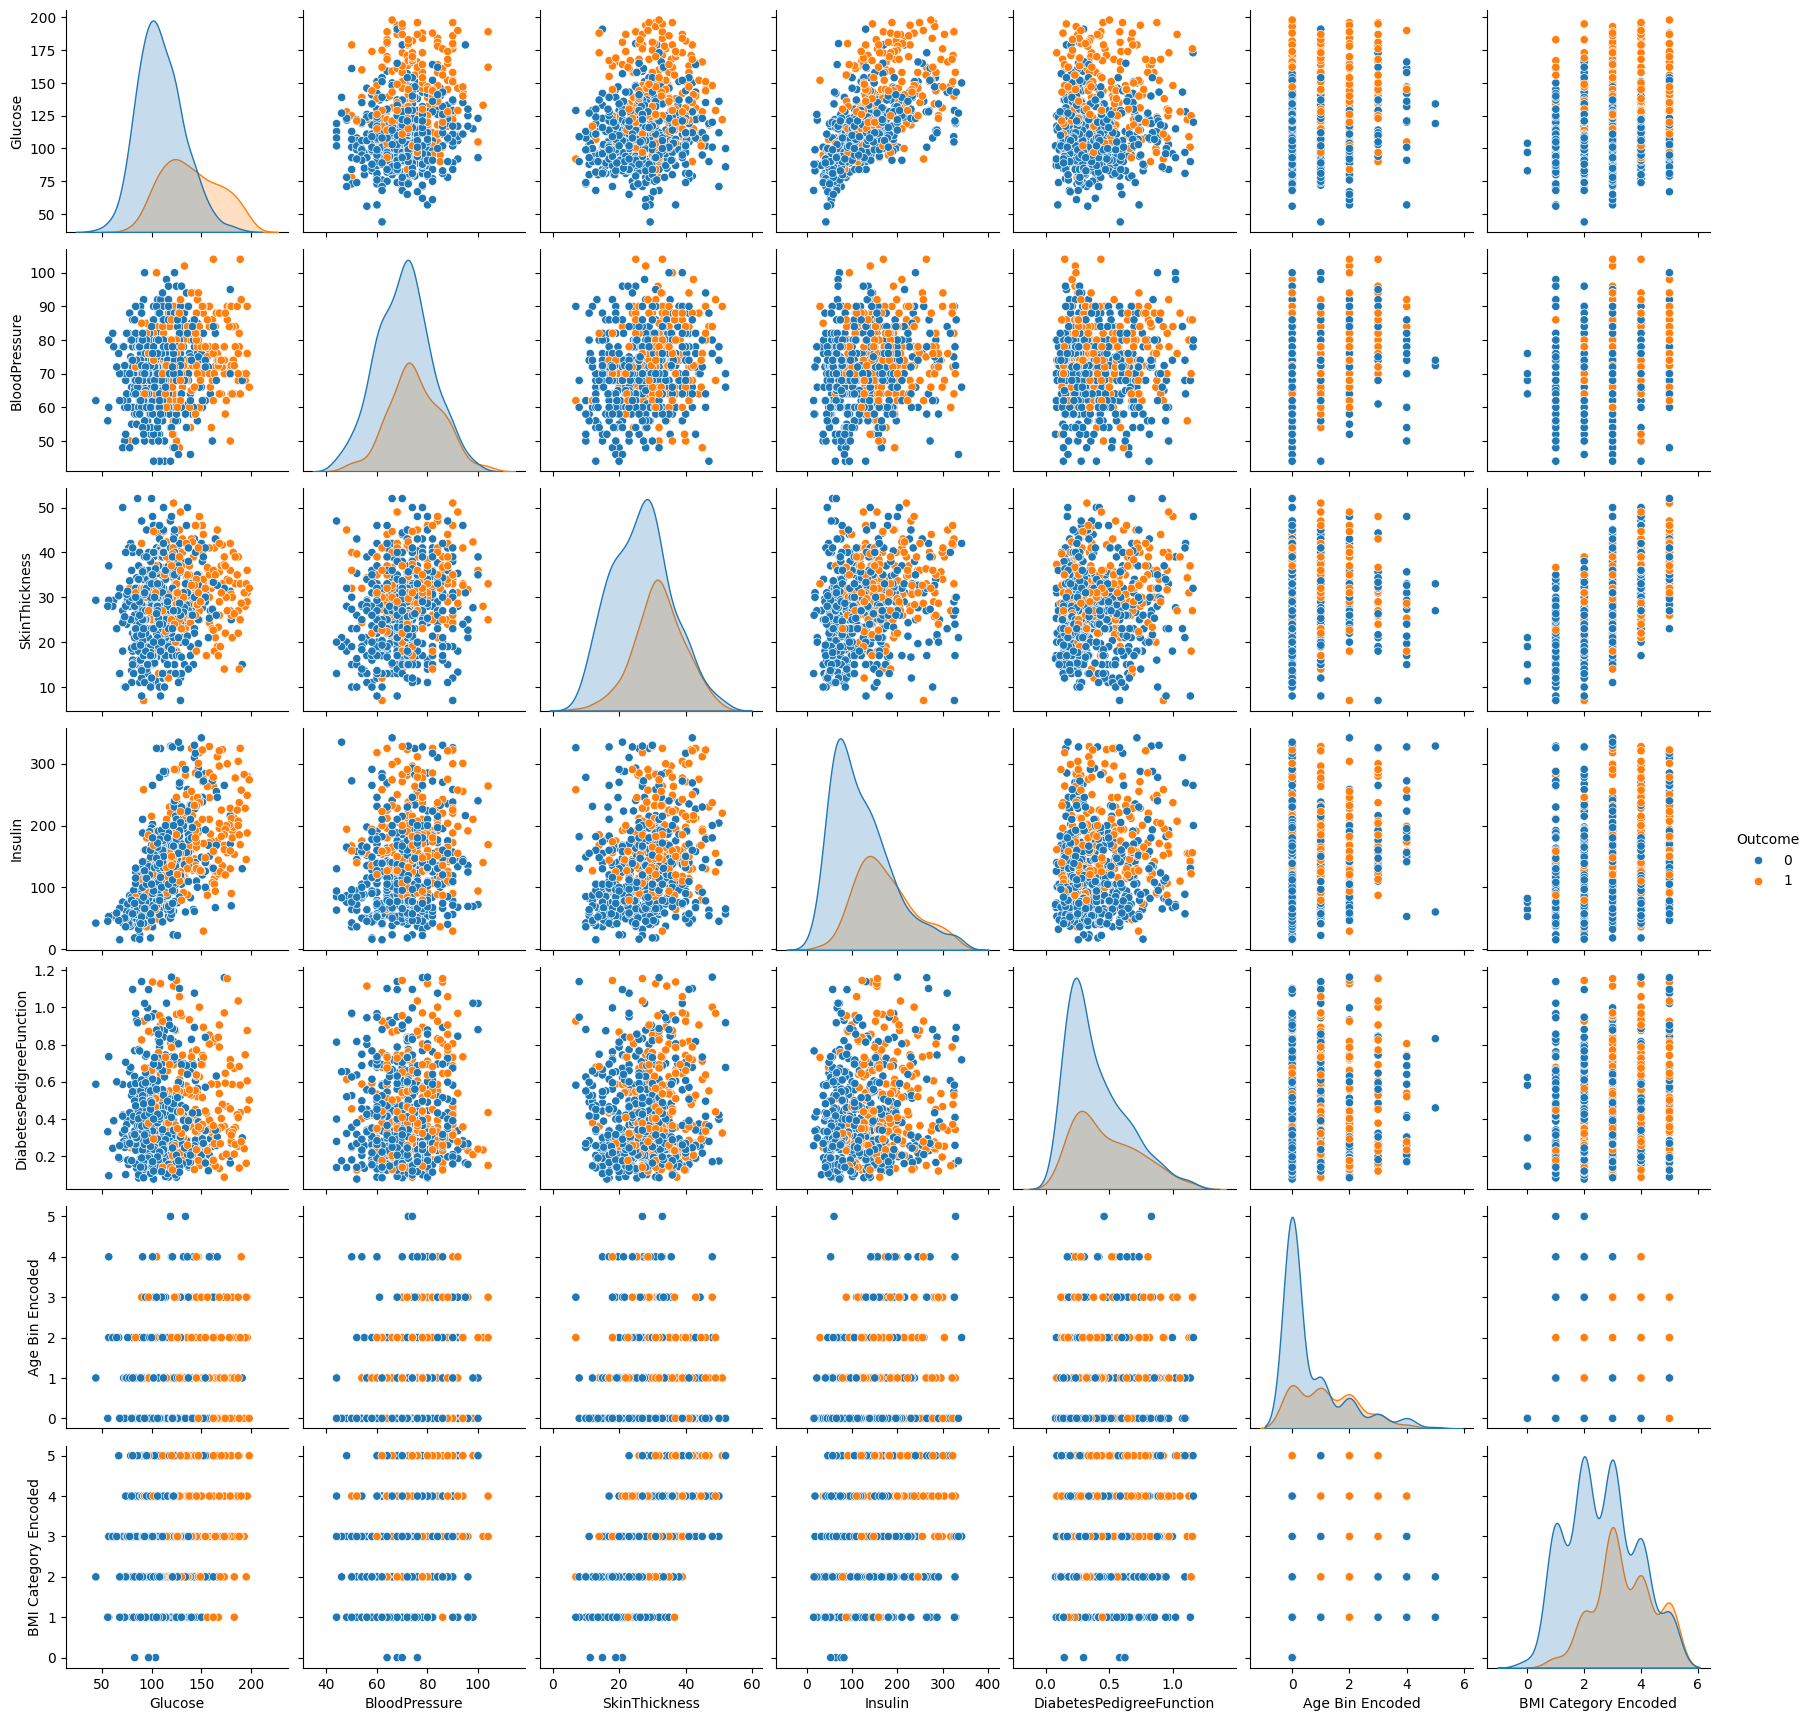

In [ ]:
# Pairplot to visualize the relationships between features
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Outcome')
plt.show()


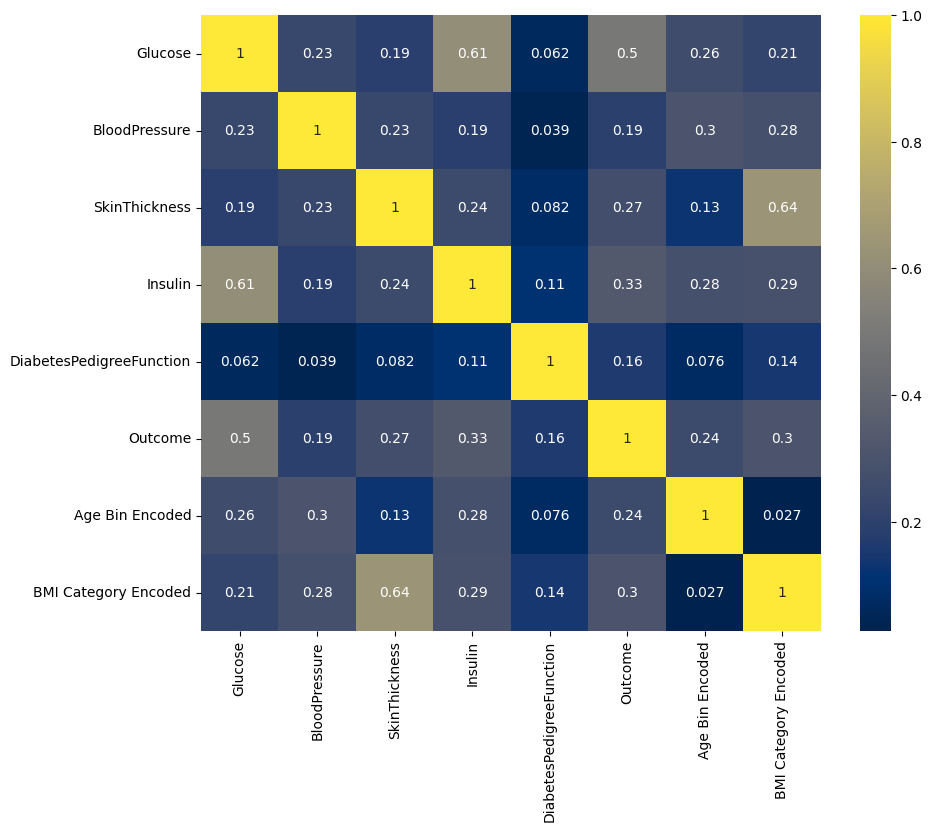

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='cividis')
plt.show()

**---------------------------------------------------------------------------**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from scipy.stats import norm

In [ ]:
X2 = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI Category Encoded', 'DiabetesPedigreeFunction', 'Age Bin Encoded']]

y2 = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.7754
KNN Accuracy: 0.7101
Decision Tree Accuracy: 0.6087
Random Forest Accuracy: 0.7609
SVM Accuracy: 0.7609
Gradient Boosting Accuracy: 0.8043


In [ ]:
#Hyperparameter for the models Logistic Regression, KNN, Decision Tree, Random Forest, Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(solver='liblinear')

param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search_log_reg = GridSearchCV(estimator=log_reg, param_grid=param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

best_params_log_reg = grid_search_log_reg.best_params_
best_score_log_reg = grid_search_log_reg.best_score_
print("Logistic Regression:")
print(f"Best parameters: {best_params_log_reg}")
print(f"Best score: {best_score_log_reg:.4f}")

best_model_log_reg = grid_search_log_reg.best_estimator_
y_pred_log_reg = best_model_log_reg.predict(X_test)
test_accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Test Accuracy: {test_accuracy_log_reg:.4f}")



Logistic Regression:
Best parameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.7832
Test Accuracy: 0.7826


In [ ]:
#KNN

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}


grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_
print("KNN:")
print(f"Best parameters: {best_params_knn}")
print(f"Best score: {best_score_knn:.4f}")

best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy: {test_accuracy_knn:.4f}")


KNN:
Best parameters: {'n_neighbors': 11}
Best score: 0.7432
Test Accuracy: 0.7319


In [ ]:
#Decision Tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_dt = GridSearchCV(estimator=decision_tree, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_
print("Decision Tree:")
print(f"Best parameters: {best_params_dt}")
print(f"Best score: {best_score_dt:.4f}")

best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(X_test)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {test_accuracy_dt:.4f}")


Decision Tree:
Best parameters: {'max_depth': 5, 'min_samples_split': 5}
Best score: 0.7249
Test Accuracy: 0.7101


In [ ]:
#Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

rf_classifier = RandomForestClassifier(random_state=42)
parameters = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameters, n_jobs=-1, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Random Forest:")

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")

Random Forest:
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.7977814845704754
Test Accuracy: 0.7608695652173914


In [ ]:
#Gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gradient_boosting = GradientBoostingClassifier()

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_
print("Gradient Boosting:")
print(f"Best parameters: {best_params_gb}")
print(f"Best score: {best_score_gb:.4f}")

best_model_gb = grid_search_gb.best_estimator_
y_pred_gb = best_model_gb.predict(X_test)
test_accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Test Accuracy: {test_accuracy_gb:.4f}")


Gradient Boosting:
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best score: 0.7905
Test Accuracy: 0.7391


In [ ]:
#Logistic Regression, Random Forest, Gradient Boosting Forest gave high accuracies, so I am going to continue with them.

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

#Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

log_reg = LogisticRegression(C=100, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Confusion Matrix:\n{cm}")

cv_scores = cross_val_score(log_reg, X2, y2, cv=5)
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean of Cross-validation Score: {cv_scores.mean():.4f}")
print("")



#Gradient Boosting
grad_boost = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=200, random_state=42)
grad_boost.fit(X_train, y_train)

y_pred_gb = grad_boost.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
cm_gb = confusion_matrix(y_test, y_pred_gb)

print("Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1 Score: {f1_gb:.4f}")
print(f"Confusion Matrix:\n{cm_gb}")
cv_scores_gb = cross_val_score(grad_boost, X2, y2, cv=5)
print(f"Cross-validation Scores: {cv_scores_gb}")
print(f"Mean of Cross-validation Score: {cv_scores_gb.mean():.4f}")
print("")

#Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=50)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{cm_rf}")
cv_scores = cross_val_score(random_forest, X2, y2, cv=5)
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean of Cross-validation Score: {cv_scores.mean():.4f}")




Logistic Regression:
Accuracy: 0.7899
Precision: 0.8000
Recall: 0.5106
F1 Score: 0.6234
Confusion Matrix:
[[85  6]
 [23 24]]
Cross-validation Scores: [0.7826087  0.73913043 0.75182482 0.80291971 0.76642336]
Mean of Cross-validation Score: 0.7686

Gradient Boosting:
Accuracy: 0.7609
Precision: 0.7500
Recall: 0.4468
F1 Score: 0.5600
Confusion Matrix:
[[84  7]
 [26 21]]
Cross-validation Scores: [0.74637681 0.72463768 0.78832117 0.81751825 0.77372263]
Mean of Cross-validation Score: 0.7701

Random Forest:
Accuracy: 0.7609
Precision: 0.7500
Recall: 0.4468
F1 Score: 0.5600
Confusion Matrix:
[[84  7]
 [26 21]]
Cross-validation Scores: [0.74637681 0.73188406 0.77372263 0.78832117 0.74452555]
Mean of Cross-validation Score: 0.7570


In [ ]:
# Based on the results, Logistic Regression would be suitable model for detecting diabetes in the dataset. The dataset is imbalanced and I took into account mean of cross validation and f1 score
# because false positives and false negatives are critical in medical diagnosis which is diabetes in my case. Logistic regression also gave the highest accuracy.

In [ ]:
#Feature importance of Logistic Regression with best parameters

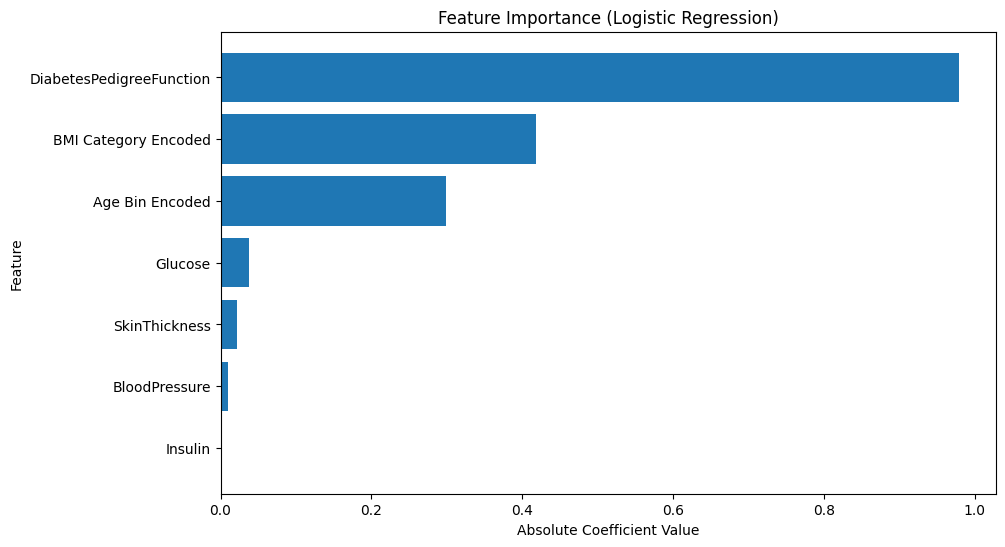

In [ ]:
best_log_reg = LogisticRegression(C=10, penalty='l2', solver='liblinear')
best_log_reg.fit(X_train, y_train)

coefficients = best_log_reg.coef_[0]

indices = np.argsort(np.abs(coefficients))[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(X_test.shape[1]), np.abs(coefficients[indices]), align='center')
plt.yticks(range(X_test.shape[1]), X_test.columns[indices])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()


 Conclusion:

 The data I analyzed is somehow problematic, it had a lot of null values to fill and each attributes required different method to fill those values, such as filling them with mean and KNN algorithms.
 It had pregnancy columns which is not clear, and the values in general are a little bit different normal values. Beside those, the distribution for columns were expected as seen in the histograms.
Skin Thickness and BMI (body mass index) gave one of the highest correlation and insulin and glicose another.
 In original data, I didnt have a categorical data except Outcome and I encoded age and bmi as Age Encoded and BMI Encoded for feature enginnering and optimization.
For machine learning I used Logistic Regression, KNN, Decision Tree, Random Forest and Gradient Boosting. I applied Hyperparameter for each one of them and continued with Logistic Regression, Random Forest and Gradient Boosting for later steps
which gave high accuricies. Then I also applied extra metrics to compare them in terms of accuracy, precision, recall, F1 score, confusion matrix, cross-validation scores, mean of cross-validation scores. I mostly took into account of
 F1 scores and cross-validation scores since the false positives and false negativies are of great importance in medical data. I chose logistic regression based on that which also had highest accuracy whose parameters are C=10, penalty='l2'. Then the model gave DiabetesPedigreeFunction
 as the most important feature in the analysis.